# Analiza rezultata treniranja

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import sys
import torch
sys.path.insert(0,'../src/')

In [2]:
colors = ['#465BBB', '#3F8FCE', '#7ABBCE', '#3A3865', '#A82F43', '#612A37', '#DC5433', '#F29457']
b1 = '#465BBB'
b2 = '#3F8FCE'
b3 = '#7ABBCE'
b4 = '#3A3865'
black1 = '#22212A'
black2 = '#2D1E21'
or1 = '#A82F43'
or2 = '#612A37'
or3 = '#DC5433'
or4 = '#F29457'
muted_colors = sns.set_palette(sns.color_palette(colors))


In [3]:
fm.get_font_names()

['cmb10',
 'cmr10',
 'cmss10',
 'STIXSizeFiveSym',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'cmex10',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmtt10',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'cmmi10',
 'cmsy10']

In [4]:
# Set up your font properties (optional)
font = fm.FontProperties()
font.set_family('serif')
font.set_name('DejaVu Sans Mono')  # Times font
sns.set(font="DejaVu Sans Mono")

%matplotlib inline 

# 32 EPOHA je izabrana zato sto nakon nje model pocinje blago pretrenirati

## 1. Ciklus

In [5]:
results_run1 = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/run1_02/results_runs_bench_final_true.pkl", "rb"))
results_class_run1 = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/run1_02/results_runs_class_bench_final_true.pkl", "rb"))

In [6]:
train_loss_run1 = [results_run1[i][0] for i in results_run1]
train_acc_run1 = [results_run1[i][1] for i in results_run1]
train_prec_run1 = [results_run1[i][2] for i in results_run1]
train_recall_run1 = [results_run1[i][3] for i in results_run1]
train_F1_run1 = [results_run1[i][4] for i in results_run1]

valid_loss_run1 = [results_run1[i][5] for i in results_run1]
valid_acc_run1 = [results_run1[i][6] for i in results_run1]
valid_prec_run1 = [results_run1[i][7] for i in results_run1]
valid_recall_run1 = [results_run1[i][8] for i in results_run1]
valid_F1_run1 = [results_run1[i][9] for i in results_run1]

train_prec_class_run1 = [results_class_run1[i][3] for i in results_class_run1]
train_recall_class_run1 = [results_class_run1[i][4] for i in results_class_run1]
train_F1_class_run1 = [results_class_run1[i][5] for i in results_class_run1]

valid_prec_class_run1 = [results_class_run1[i][9] for i in results_class_run1]
valid_recall_class_run1 = [results_class_run1[i][10] for i in results_class_run1]
valid_F1_class_run1 = [results_class_run1[i][11] for i in results_class_run1]

valid_probs_run1 = [results_class_run1[i][6] for i in results_class_run1]
valid_true_run1 = [results_class_run1[i][7] for i in results_class_run1]
valid_ids_run1 = [results_class_run1[i][8] for i in results_class_run1]

---

In [7]:
per_class = pd.DataFrame()

vprec_class = valid_prec_class_run1[32]
vrecall_class = valid_recall_class_run1[32]
vf1_class = valid_F1_class_run1[32]
tprec_class = train_prec_class_run1[32]
trecall_class = train_recall_class_run1[32]
tf1_class = train_F1_class_run1[32]

per_class['Preciznost (U)'] = vprec_class
per_class['Osjetljivost (U)'] = vrecall_class
per_class['F1 mjera (U)'] = vf1_class

per_class['Preciznost (V)'] = tprec_class
per_class['Osjetjlivost (V)'] = trecall_class
per_class['F1 mjera (V)'] = tf1_class

per_class

,Preciznost (U),Osjetljivost (U),F1 mjera (U),Preciznost (V),Osjetjlivost (V),F1 mjera (V)
0,0.835098,0.825112,0.830075,0.897582,0.882875,0.890168
1,0.863460,0.908951,0.885622,0.916714,0.941475,0.928930
2,0.868475,0.838025,0.852978,0.915342,0.911369,0.913352


In [8]:
predicted = np.argmax(valid_probs_run1[32], axis=1)
predicted[:4]

array([0, 1, 1, 0])

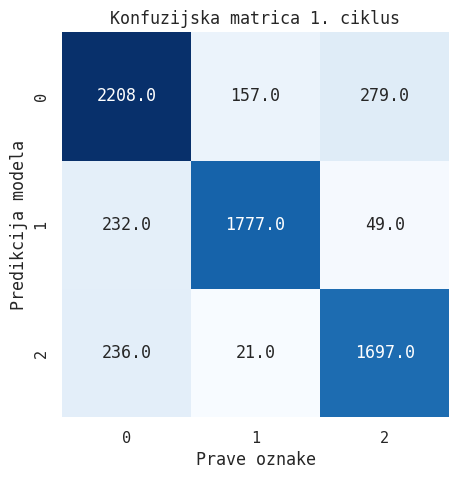

In [9]:
ct = pd.crosstab(predicted,  valid_true_run1[32], rownames=["Predikcija modela"], colnames=["Prave oznake"])
plt.figure(figsize=(5,5))
sns.heatmap(ct, cmap="Blues", annot=True, xticklabels="012", yticklabels="012", fmt=".1f", cbar=False)
plt.title("Konfuzijska matrica 1. ciklus",fontproperties=font, fontsize=12)
plt.show()

---

# 2. Ciklus

In [10]:
results_run2 = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/run2_02/results_runs_bench_final_true.pkl", "rb"))
results_class_run2 = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/run2_02/results_runs_class_bench_final_true.pkl", "rb"))

In [11]:
train_loss_run2 = [results_run2[i][0] for i in results_run2]
train_acc_run2 = [results_run2[i][1] for i in results_run2]
train_prec_run2 = [results_run2[i][2] for i in results_run2]
train_recall_run2 = [results_run2[i][3] for i in results_run2]
train_F1_run2 = [results_run2[i][4] for i in results_run2]
valid_loss_run2 = [results_run2[i][5] for i in results_run2]
valid_acc_run2 = [results_run2[i][6] for i in results_run2]
valid_prec_run2 = [results_run2[i][7] for i in results_run2]
valid_recall_run2 = [results_run2[i][8] for i in results_run2]
valid_F1_run2 = [results_run2[i][9] for i in results_run2]

train_prec_class_run2 = [results_class_run2[i][3] for i in results_class_run2]
train_recall_class_run2 = [results_class_run2[i][4] for i in results_class_run2]
train_F1_class_run2 = [results_class_run2[i][5] for i in results_class_run2]

valid_prec_class_run2 = [results_class_run2[i][9] for i in results_class_run2]
valid_recall_class_run2 = [results_class_run2[i][10] for i in results_class_run2]
valid_F1_class_run2 = [results_class_run2[i][11] for i in results_class_run2]

valid_probs_run2 = [results_class_run2[i][6] for i in results_class_run2]
valid_true_run2 = [results_class_run2[i][7] for i in results_class_run2]
valid_ids_run2 = [results_class_run2[i][8] for i in results_class_run2]

In [12]:
per_class2 = pd.DataFrame()

vprec_class2 = valid_prec_class_run2[32]
vrecall_class2 = valid_recall_class_run2[32]
vf1_class2 = valid_F1_class_run2[32]
tprec_class2 = train_prec_class_run2[32]
trecall_class2 = train_recall_class_run2[32]
tf1_class2 = train_F1_class_run2[32]

per_class2['Preciznost (U)'] = vprec_class2
per_class2['Osjetljivost (U)'] = vrecall_class2
per_class2['F1 mjera (U)'] = vf1_class2

per_class2['Preciznost (V)'] = tprec_class2
per_class2['Osjetjlivost (V)'] = trecall_class2
per_class2['F1 mjera (V)'] = tf1_class2

per_class2

,Preciznost (U),Osjetljivost (U),F1 mjera (U),Preciznost (V),Osjetjlivost (V),F1 mjera (V)
0,0.795127,0.801339,0.798221,0.867023,0.874722,0.870856
1,0.689379,0.770437,0.727657,0.795002,0.796766,0.795883
2,0.666265,0.616499,0.640417,0.714150,0.716413,0.715280
3,0.687140,0.723232,0.704724,0.777967,0.781295,0.779627
4,0.651982,0.594975,0.622176,0.716758,0.709392,0.713056
5,0.612132,0.671371,0.640385,0.744029,0.692900,0.717555
6,0.762120,0.680765,0.719149,0.777987,0.826112,0.801327


In [13]:
predicted2 = np.argmax(valid_probs_run2[32], axis=1)
predicted2[:4]

array([4, 1, 4, 0])

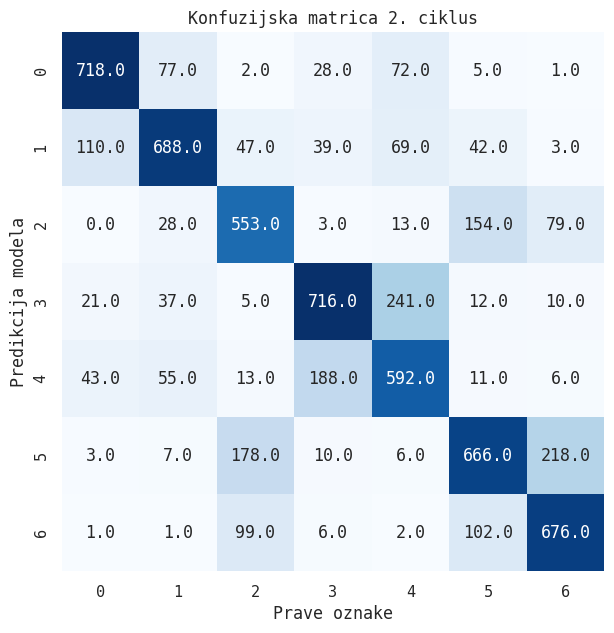

In [14]:
ct = pd.crosstab(predicted2,  valid_true_run2[32], rownames=["Predikcija modela"], colnames=["Prave oznake"])
plt.figure(figsize=(7,7))
sns.heatmap(ct, cmap="Blues", annot=True, xticklabels="0123456", yticklabels="0123456", fmt=".1f", cbar=False)
plt.title("Konfuzijska matrica 2. ciklus",fontproperties=font, fontsize=12)
plt.show()

---

# Klasični model

In [15]:
results_benchmark = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/benchmark/results_runs_bench_final_true.pkl", "rb"))
results_class_benchmark = pickle.load(open("/teamspace/studios/this_studio/galaxy_morph/output/benchmark/results_runs_class_bench_final_true.pkl", "rb"))

In [16]:
train_loss_benchmark = [results_benchmark[i][0] for i in results_benchmark]
train_acc_benchmark = [results_benchmark[i][1] for i in results_benchmark]
train_prec_benchmark = [results_benchmark[i][2] for i in results_benchmark]
train_recall_benchmark = [results_benchmark[i][3] for i in results_benchmark]
train_F1_benchmark = [results_benchmark[i][4] for i in results_benchmark]
valid_loss_benchmark = [results_benchmark[i][5] for i in results_benchmark]
valid_acc_benchmark = [results_benchmark[i][6] for i in results_benchmark]
valid_prec_benchmark = [results_benchmark[i][7] for i in results_benchmark]
valid_recall_benchmark = [results_benchmark[i][8] for i in results_benchmark]
valid_F1_benchmark = [results_benchmark[i][9] for i in results_benchmark]

train_prec_class_benchmark = [results_class_benchmark[i][3] for i in results_class_benchmark]
train_recall_class_benchmark = [results_class_benchmark[i][4] for i in results_class_benchmark]
train_F1_class_benchmark = [results_class_benchmark[i][5] for i in results_class_benchmark]

valid_prec_class_benchmark = [results_class_benchmark[i][9] for i in results_class_benchmark]
valid_recall_class_benchmark = [results_class_benchmark[i][10] for i in results_class_benchmark]
valid_F1_class_benchmark = [results_class_benchmark[i][11] for i in results_class_benchmark]

valid_probs_benchmark = [results_class_benchmark[i][6] for i in results_class_benchmark]
valid_true_benchmark = [results_class_benchmark[i][7] for i in results_class_benchmark]
valid_ids_benchmark = [results_class_benchmark[i][8] for i in results_class_benchmark]

In [17]:
per_class_benchmark = pd.DataFrame()

vprec_class_benchmark = valid_prec_class_benchmark[32]
vrecall_class_benchmark = valid_recall_class_benchmark[32]
vf1_class_benchmark = valid_F1_class_benchmark[32]
tprec_class_benchmark = train_prec_class_benchmark[32]
trecall_class_benchmark = train_recall_class_benchmark[32]
tf1_class_benchmark = train_F1_class_benchmark[32]

per_class_benchmark['Preciznost (U)'] = vprec_class_benchmark
per_class_benchmark['Osjetljivost (U)'] = vrecall_class_benchmark
per_class_benchmark['F1 mjera (U)'] = vf1_class_benchmark

per_class_benchmark['Preciznost (V)'] = tprec_class_benchmark
per_class_benchmark['Osjetjlivost (V)'] = trecall_class_benchmark
per_class_benchmark['F1 mjera (V)'] = tf1_class_benchmark

per_class_benchmark

,Preciznost (U),Osjetljivost (U),F1 mjera (U),Preciznost (V),Osjetjlivost (V),F1 mjera (V)
0,0.722328,0.844866,0.778807,0.743058,0.773507,0.757977
1,0.716033,0.590146,0.647023,0.647987,0.612821,0.629914
2,0.608445,0.706800,0.653945,0.577557,0.590591,0.584001
3,0.631633,0.625253,0.628426,0.619088,0.629545,0.624273
4,0.581485,0.606030,0.593504,0.567770,0.564682,0.566222
5,0.629471,0.443548,0.520402,0.552623,0.479805,0.513646
6,0.695691,0.780463,0.735643,0.671377,0.746358,0.706885


In [18]:
predicted_bench = np.argmax(valid_probs_benchmark[32], axis=1)
predicted_bench[:4]

array([4, 1, 4, 0])

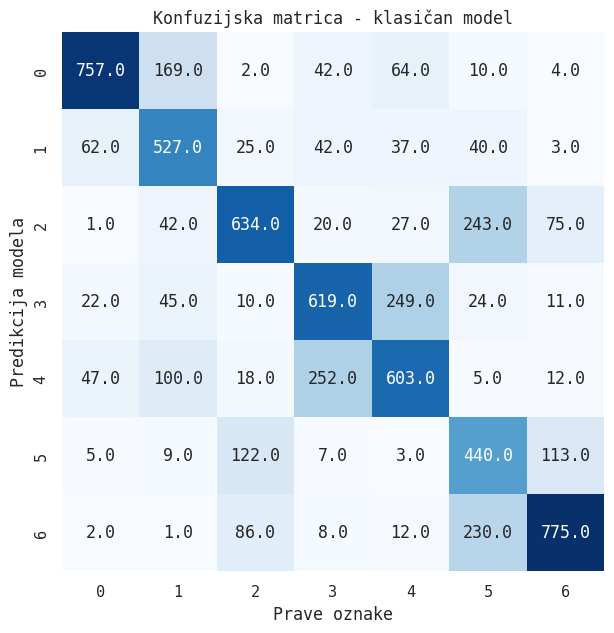

In [19]:
ct = pd.crosstab(predicted_bench,  valid_true_benchmark[32], rownames=["Predikcija modela"], colnames=["Prave oznake"])
plt.figure(figsize=(7,7))
sns.heatmap(ct, cmap="Blues", annot=True, xticklabels="0123456", yticklabels="0123456", fmt=".1f", cbar=False)
plt.title("Konfuzijska matrica - klasičan model",fontproperties=font, fontsize=12)
plt.show()

In [20]:
valid_probs_array = np.array(valid_probs_run2[32])

max_probs = (np.max(valid_probs_array, axis=1), np.argmax(valid_probs_array, axis=1))

class_probs = pd.DataFrame()
class_probs['Vjerojatnost'] = max_probs[0]
class_probs['Predikcija'] = max_probs[1]
class_probs['Oznaka'] = valid_true_run2[32]

class_probs['Correct'] = np.where(class_probs['Predikcija'] == class_probs['Oznaka'], 1, 0)

print(sum(class_probs['Correct'])/class_probs.shape[0])

0.6924579326923077


In [21]:
class_probs.head(10)

,Vjerojatnost,Predikcija,Oznaka,Correct
0,0.774414,4,4,1
1,0.857910,1,1,1
2,0.917969,4,4,1
3,0.982910,0,0,1
4,0.998535,0,0,1
5,0.876465,2,2,1
6,0.574219,2,5,0
7,0.746582,4,1,0
8,0.903809,4,4,1
9,0.949707,6,6,1


<Axes: xlabel='Vjerojatnost', ylabel='Count'>

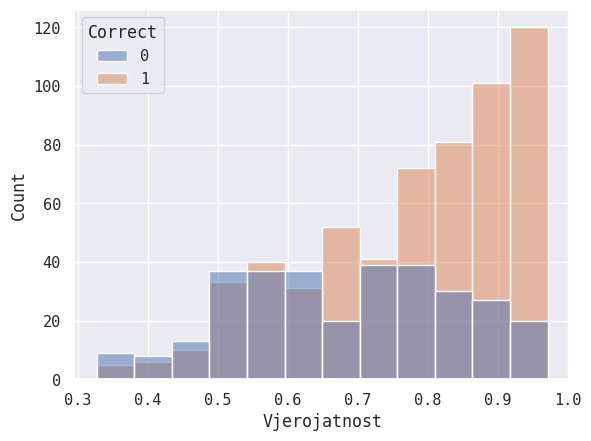

In [22]:
sns.histplot(class_probs[class_probs['Predikcija'] == 4], x='Vjerojatnost', hue='Correct')

<Axes: xlabel='Vjerojatnost', ylabel='Count'>

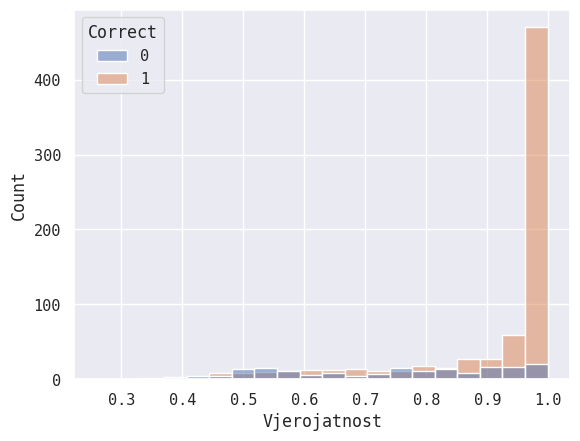

In [23]:
sns.histplot(class_probs[class_probs['Predikcija'] == 0], x='Vjerojatnost', hue='Correct')

---

## plotovi metrika

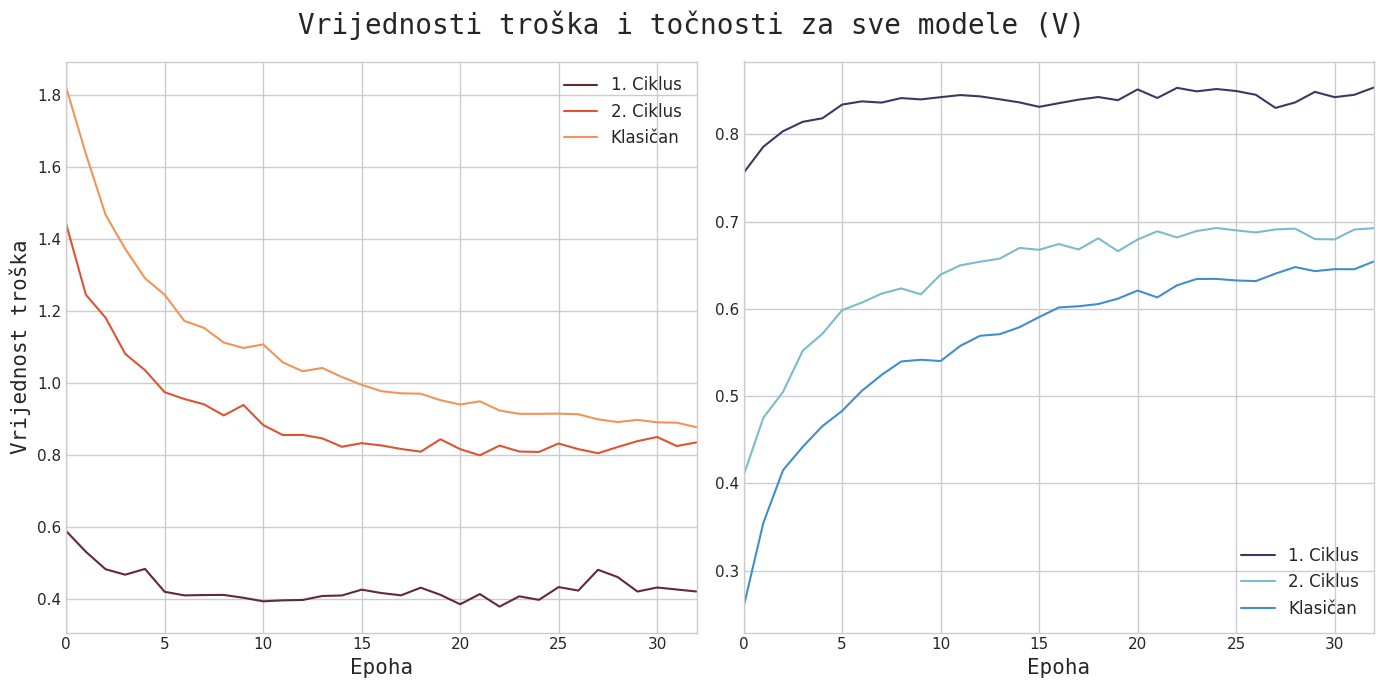

In [25]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
plt.style.use('seaborn-v0_8-whitegrid')
fig.suptitle("Vrijednosti troška i točnosti za sve modele (V)", fontproperties=font, fontsize=20)

ax[0].set_xlim([0,32])
ax[0].plot(valid_loss_run1[:33], color=or2, label="1. Ciklus")
ax[0].plot(valid_loss_run2[:33], color=or3, label="2. Ciklus")
ax[0].plot(valid_loss_benchmark[:33], color=or4, label="Klasičan")
ax[0].set_xlabel("Epoha", fontproperties=font, fontsize=15)
ax[0].set_ylabel("Vrijednost troška", fontproperties=font, fontsize=15)

ax[1].set_xlim([0,32])
ax[1].plot(valid_acc_run1[:33], color=b4, label="1. Ciklus")
ax[1].plot(valid_acc_run2[:33], color=b3, label="2. Ciklus")
ax[1].plot(valid_acc_benchmark[:33], color=b2, label="Klasičan")
ax[1].set_xlabel("Epoha", fontproperties=font, fontsize=15)

ax[0].legend(fontsize=12, fancybox=True, facecolor="white")
ax[1].legend(fontsize=12, fancybox=True, facecolor="white")

fig.tight_layout()

plt.show()

---

In [37]:
from datap_efficient_bench import *
from model_train_benchmark import *
from labeling_system import *
import cvt_benchmark_attn as cvtb

In [35]:
main_runs = pd.read_csv('../input/main_runs.csv')
# ------

soft_label_dict_run1 = create_label_dict1(main_runs)
soft_label_dict_run2 = create_label_dict2(main_runs)

soft_run1_conf, soft_run1_spur = section_spurious(soft_label_dict_run1, num=3)
soft_run2_conf, soft_run2_spur = section_spurious(soft_label_dict_run2, num=7)

hard_run1_conf = create_hard_labels(soft_run1_conf)
hard_run2_conf = create_hard_labels(soft_run2_conf)

print(Counter(list(hard_run1_conf.values())))
print(Counter(list(hard_run2_conf.values())))

imgs_path = '../input/images_gz2/images/'
W, H, C = 224, 224, 4

conf_file_list = create_file_list(imgs_path, soft_run1_conf, soft_run2_conf)

n = 1000
bs = 128
embed_size = 64
device= 'cuda' if torch.cuda.is_available() else 'cpu'

images_orig, labels_orig = data_setup(conf_file_list, hard_run2_conf, n)
traino, valido, testo, y_traino, y_valido, y_testo = split_data(images_orig, labels_orig)

train_iter, valid_iter, test_iter = create_dali_iterators(traino, valido, testo, hard_run2_conf, bs)

Counter({0: 130557, 1: 56602, 2: 17603})
Counter({1: 69767, 0: 58485, 4: 51702, 5: 14903, 3: 13821, 2: 9566, 6: 6043})
Counter({1: 63971, 0: 57249, 4: 44374, 3: 12825, 5: 12442, 2: 7602, 6: 5025})
[('../input/images_gz2/images/100.jpg', 0), ('../input/images_gz2/images/1000.jpg', 0), ('../input/images_gz2/images/10000.jpg', 1), ('../input/images_gz2/images/100000.jpg', 5)]
57249 63971 7602 12825 44374 12442 5025
3849 1089 562
['../input/images_gz2/images/112951.jpg', '../input/images_gz2/images/109525.jpg', '../input/images_gz2/images/236173.jpg', '../input/images_gz2/images/263251.jpg', '../input/images_gz2/images/35331.jpg'] [0, 5, 6, 4, 0]


In [38]:
model_path = '../output/benchmark/model_benchmark_test_maps_02_epoch32.pth'
gmorph_model = cvtb.CvT_bench(embed_size, 7)
state_dict = torch.load(model_path)      
gmorph_model.load_state_dict(state_dict)         
gmorph_model.eval() 

y_true, y_preds, galaxy_ids = test_model(test_iter, gmorph_model, device)

RuntimeError: Input type (c10::Half) and bias type (float) should be the same